In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriharshabsprasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Data Acquisition and Loading

In [2]:
# read a csv file and create a dataframe
df = pd.read_csv("data/labeledTrainData.tsv", sep='\t')

In [3]:
# Display the top 10 rows of a dataframe
print("First ten rows of the dataset:")
df.head(10)

First ten rows of the dataset:


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [4]:
# Display the bottom 5 rows of a dataframe
df.tail()

,id,sentiment,review
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...
24999,8478_8,1,I saw this movie as a child and it broke my he...


In [5]:
print("Dimensions of the data frame:", df.shape)

Dimensions of the data frame: (25000, 3)


In [6]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [7]:
# Count the number of positive and negative reviews
print("Number of positive reviews:", len(df[df['sentiment'] == 1]))
print("Number of negative reviews:", len(df[df['sentiment'] == 0]))

Number of positive reviews: 12500
Number of negative reviews: 12500


###  Convert all text to lowercase letters.

In [8]:
# Convert review text to lower case letter
df['preprocessed_review'] = df['review'].str.lower()

###  Remove punctuation and special characters from the text.

In [9]:
# Check for punctuation and filter the review text by excluding the punctuation
df['preprocessed_review'] = df['preprocessed_review'].apply(
    lambda x: ''.join([char for char in x if char not in string.punctuation])
)

### Remove stop words.

In [10]:
# Load the english stop words and store it in stop_words list
stop_words = stopwords.words('english')

In [11]:
# Remove the stop words from preprocessed review text column
df['preprocessed_review'] = df['preprocessed_review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

### Apply NLTK’s PorterStemmer.

In [12]:
# Load the NLTK's PorterStemmer
stemmer = PorterStemmer()

In [13]:
# Read the preprocessed review text from the above steps and perform stemming using the PorterStemmer object
# Store the results in stemmed_review column
df['stemmed_review'] = df['preprocessed_review'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
)

In [14]:
# Display the top 5 rows
df.head()

,id,sentiment,review,preprocessed_review,stemmed_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj ive started listening mu...,stuff go moment mj ive start listen music watc...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...,classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...,film start manag nichola bell give welcom inve...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,must assum prais film greatest film opera ever...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80s e...,superbl trashi wondrous unpretenti 80 exploit ...


In [15]:
# Display the bottom 5 rows
df.tail()

,id,sentiment,review,preprocessed_review,stemmed_review
24995,3453_3,0,It seems like more consideration has gone into...,seems like consideration gone imdb reviews fil...,seem like consider gone imdb review film went ...
24996,5064_1,0,I don't believe they made this film. Completel...,dont believe made film completely unnecessary ...,dont believ made film complet unnecessari firs...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy loser cant get girls needs build picked st...,guy loser cant get girl need build pick strong...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,30 minute documentary buñuel made early 1930s ...,30 minut documentari buñuel made earli 1930 on...
24999,8478_8,1,I saw this movie as a child and it broke my he...,saw movie child broke heart story unfinished e...,saw movi child broke heart stori unfinish end ...


## 2. Split this into a training and test set.

In [16]:
# Split into training and test set - 80% as Training data and 20% as Test data
X_train, X_test, y_train, y_test = train_test_split(df['stemmed_review'], 
                                                    df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)

## 3. Fit and apply the tf-idf vectorization to the training set.

In [17]:
# Create tfidf vectorizer object
tfidf = TfidfVectorizer()

# Call fit_transform method for training data
X_train_tfidf = tfidf.fit_transform(X_train)

## 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [18]:
# Apply tf-idf vectorization to the test set
X_test_tfidf = tfidf.transform(X_test)

#### DO NOT FIT the tf-idf vectorization to the test set . Here are the reasons:

1. Fitting on test set would give the model information about the test data, skewing performance metrics like accuracy and causing overly optimistic results.

2. Fitting the vectorizer on the test set, we end up using test data during training, defeating the purpose of testing on unseen data.

Overall, we do not fit on test data to avoid data leakage and to test how the model will perform in real-world situations where future data is unknown.

## 5. Train a logistic regression using the training data.

In [19]:
# Initialize Logistic regression model
lr_model = LogisticRegression()

In [20]:
# Fit model with training data
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

## 6. Find the model accuracy on test set.

In [21]:
# Predict on test set
log_model_pred = lr_model.predict(X_test_tfidf)

In [22]:
# Calculate model accuracy
log_model_accuracy = accuracy_score(y_test, log_model_pred)
print(f'Logistic Regression Accuracy: {log_model_accuracy}')

Logistic Regression Accuracy: 0.8876


## 7. Create a confusion matrix for the test set predictions.

In [23]:
# Create confusion matrix
log_model_conf_matrix = confusion_matrix(y_test, log_model_pred)
print(f'Logistic Regression Confusion Matrix:\n{log_model_conf_matrix}')

Logistic Regression Confusion Matrix:
[[2162  319]
 [ 243 2276]]


## 8. Get the precision, recall, and F1-score for the test set predictions.

In [24]:
# Get precision, recall, and F1-score
log_model_precision, log_model_recall, log_model_f1, _ = precision_recall_fscore_support(y_test, 
                                                           log_model_pred, 
                                                           average='binary')
print(f'Logistic Regression:\nPrecision: {log_model_precision}, \nRecall: {log_model_recall}, \nF1-score: {log_model_f1}')

Logistic Regression:
Precision: 0.8770712909441233, 
Recall: 0.9035331480746328, 
F1-score: 0.8901055924912006


## 9. Create a ROC curve for the test set.

In [25]:
# Create a ROC curve for the test set
log_model_pred_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_model_pred_prob)
roc_auc = auc(fpr, tpr)

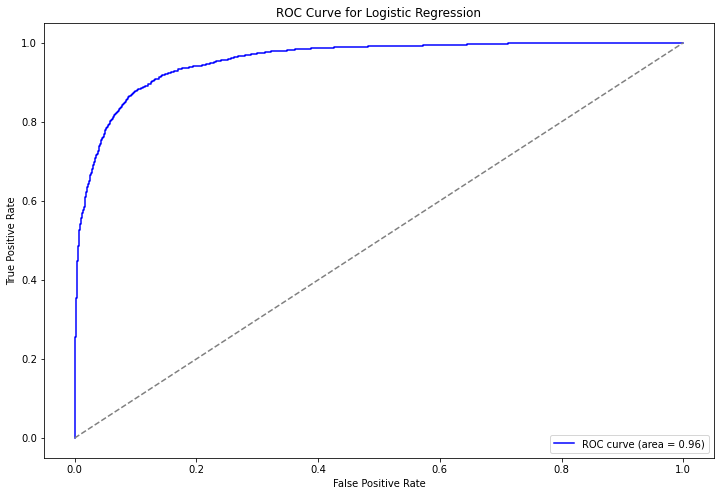

In [26]:
# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## 10. Pick another classification model you learned about this week and repeat steps (5) – (9).


### i. XGBoost Classifier

In [27]:
# Train an XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)

/Users/sriharshabsprasad/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [28]:
# Predict on test set using XGBoost
xgb_model_pred = xgb_model.predict(X_test_tfidf)

In [29]:
# Calculate model accuracy for XGBoost
xgb_model_accuracy = accuracy_score(y_test, xgb_model_pred)
print(f'XGBoost Accuracy: {xgb_model_accuracy}')

XGBoost Accuracy: 0.8582


In [30]:
# Create confusion matrix for XGBoost
xgb_model_conf_matrix = confusion_matrix(y_test, xgb_model_pred)
print(f'XGBoost Confusion Matrix:\n{xgb_model_conf_matrix}')

XGBoost Confusion Matrix:
[[2083  398]
 [ 311 2208]]


In [31]:
# Get precision, recall, and F1-score for XGBoost
xgb_model_precision, xgb_model_recall, xgb_model_f1, _ = precision_recall_fscore_support(y_test, 
                                                                                         xgb_model_pred, 
                                                                                         average='binary')
print(f'XGBoost:\nPrecision: {xgb_model_precision}, \nRecall: {xgb_model_recall}, \nF1-score: {xgb_model_f1}')

XGBoost:
Precision: 0.8472755180353031, 
Recall: 0.8765383088527193, 
F1-score: 0.8616585365853658


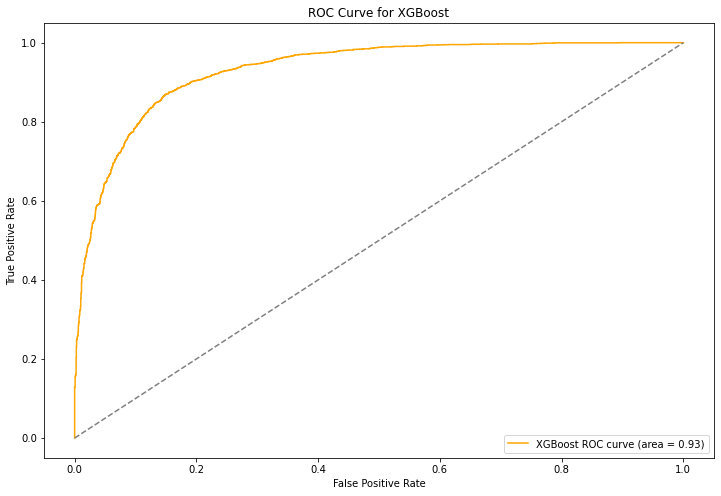

In [32]:
# Create a ROC curve for the XGBoost
xgb_model_pred_prob = xgb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model_pred_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve for XGBoost
plt.figure(figsize=(12, 8))
plt.plot(fpr_xgb, tpr_xgb, color='orange', label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


### ii. Naive Bayes Classifier

In [33]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [34]:
# Predict on test set using Naive Bayes
nb_model_pred = nb_model.predict(X_test_tfidf)

In [35]:
# Find model accuracy for Naive Bayes
nb_model_accuracy = accuracy_score(y_test, nb_model_pred)
print(f'Naive Bayes Accuracy: {nb_model_accuracy}')

Naive Bayes Accuracy: 0.8588


In [36]:
# Create confusion matrix for Naive Bayes
nb_model_conf_matrix = confusion_matrix(y_test, nb_model_pred)
print(f'Naive Bayes Confusion Matrix:\n{nb_model_conf_matrix}')

Naive Bayes Confusion Matrix:
[[2149  332]
 [ 374 2145]]


In [37]:
# Get precision, recall, and F1-score for Naive Bayes
nb_model_precision, nb_model_recall, nb_model_f1, _ = precision_recall_fscore_support(y_test, 
                                                                                      nb_model_pred, 
                                                                                      average='binary')
print(f'Naive Bayes:\nPrecision: {nb_model_precision}, \nRecall: {nb_model_recall}, \nF1-score: {nb_model_f1}')

Naive Bayes:
Precision: 0.8659668954380298, 
Recall: 0.851528384279476, 
F1-score: 0.8586869495596477


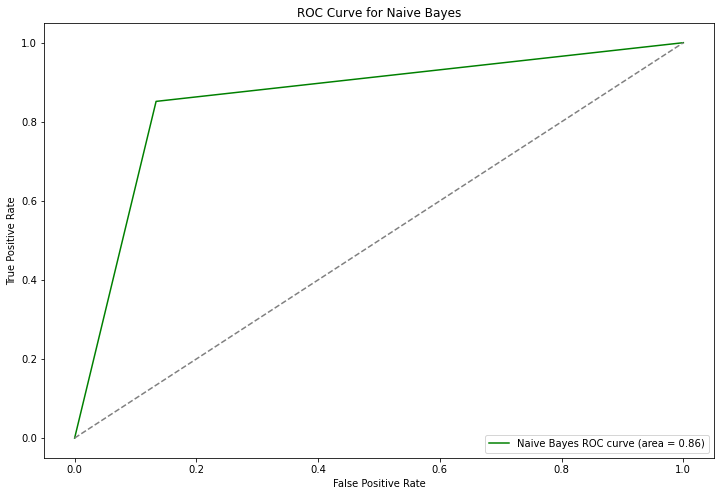

In [38]:
# Create a ROC curve for the Naive Bayes
nb_model_pred_prob = nb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(12, 8))
plt.plot(fpr_nb, tpr_nb, color='green', label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()